<a href="https://colab.research.google.com/github/MasahiroAraki/SpeechRecognition/blob/master/Python/chap05a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5章 解答例

In [1]:
# mlxtendパッケージを最新(0.20.0)に更新
!pip install -U mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 5.6 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


## 例題5.1

最小二乗法の解析的手法をPythonでコーディングせよ．

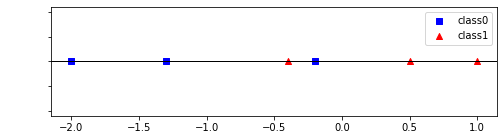

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[1.0], [0.5], [-0.2], [-0.4], [-1.3], [-2.0]])
y = np.array([1, 1, 0, 1, 0, 0])

plt.figure(figsize=(8,2))
plt.yticks(color="None")
plt.axhline(y=0, linewidth=1, c='black')
plt.scatter(X[y==0], np.zeros(len(X[y==0])), c='blue', marker='s', label='class0')
plt.scatter(X[y==1], np.zeros(len(X[y==1])), c='red', marker='^', label='class1')
plt.legend(loc='upper right')

(n, d) = X.shape
X2 = np.concatenate((np.ones((n, 1)), X), axis=1)

解析的手法による解法のコードを記述せよ。

In [3]:
w = np.linalg.inv(X2.T @ X2) @ X2.T @ y
print(f'result: {w}')

result: [0.64886731 0.37216828]


[numpy.linalg.lstsq](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html) 最小二乗法を実行する関数を用いた別解を記述せよ。

In [4]:
w2 = np.linalg.lstsq(X2, y, rcond=None)[0]  # rcond=Noneは警告を消すため
print(f'result: {w2}')

result: [0.64886731 0.37216828]


## 例題5.3

Widrow-Hoffの学習規則を Python でコーディングせよ．

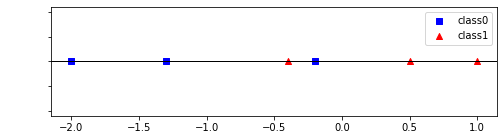

In [5]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[1.0], [0.5], [-0.2], [-0.4], [-1.3], [-2.0]])
y = np.array([1, 1, 0, 1, 0, 0])

plt.figure(figsize=(8,2))
plt.yticks(color="None")
plt.axhline(y=0, linewidth=1, c='black')
plt.scatter(X[y==0], np.zeros(len(X[y==0])), c='blue', marker='s', label='class0')
plt.scatter(X[y==1], np.zeros(len(X[y==1])), c='red', marker='^', label='class1')
plt.legend(loc='upper right')

eps = 1e-8
differ = np.inf
olderr = np.inf
w = np.array([0.2, 0.3])
rho = 0.2
(n, d) = X.shape
X2 = np.concatenate((np.ones((n, 1)), X), axis=1)

Widrow-Hoffの学習規則を記述せよ。

In [6]:
while differ > eps:
    g = X2 @ w - y
    w = w - rho * np.sum(g * X2.T, axis=1)
    sqrerr = 0.5 * np.sum(g**2)
    differ = np.abs(olderr - sqrerr)
    olderr = sqrerr
    print(f'w = {w}')

w = [0.704  0.1876]
w = [0.549248  0.4776272]
w = [0.71941146 0.2792146 ]
w = [0.59014072 0.44581365]
w = [0.69596241 0.3124593 ]
w = [0.61078798 0.42032938]
w = [0.6796005  0.33327726]
w = [0.62405298 0.40356557]
w = [0.66890088 0.34681937]
w = [0.63269312 0.39263373]
w = [0.66192557 0.35564546]
w = [0.63832471 0.38550802]
w = [0.65737891 0.36139843]
w = [0.64199546 0.38086335]
w = [0.65441531 0.36514831]
w = [0.64438813 0.37783587]
w = [0.65248359 0.36759255]
w = [0.6459477  0.37586252]
w = [0.65122447 0.36918574]
w = [0.64696426 0.37457625]
w = [0.65040375 0.37022421]
w = [0.64762687 0.37373784]
w = [0.64986879 0.37090111]
w = [0.64805877 0.37319134]
w = [0.64952009 0.37134232]
w = [0.64834029 0.37283513]
w = [0.6492928 0.3716299]
w = [0.64852379 0.37260295]
w = [0.64914466 0.37181736]
w = [0.6486434  0.37245161]
w = [0.64904809 0.37193955]
w = [0.64872136 0.37235296]
w = [0.64898515 0.37201919]
w = [0.64877218 0.37228866]
w = [0.64894412 0.3720711 ]
w = [0.6488053  0.37224675]
w = 

### 機械学習ライブラリ scikit-learn を利用した勾配降下法のコード

乱数で生成した線形分離不可能な2クラスのデータに対して、勾配降下法 [SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)を用いて二乗誤差最小の識別面を求め、mlxtendによって識別面を表示せよ。

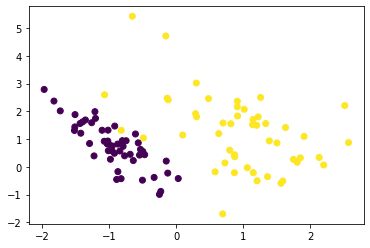

In [7]:
from sklearn.datasets import make_classification
from sklearn.linear_model import SGDClassifier
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

X, y = make_classification(n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=2)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)

SGDClassifierの学習と識別面の表示を行うコードを記述せよ。

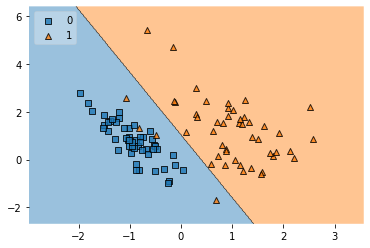

In [8]:
clf = SGDClassifier(loss='squared_error', eta0=0.01, learning_rate="constant", penalty=None)
clf.fit(X, y)
plot_decision_regions(X=X, y=y, clf=clf, legend=2)